In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Fake News Detection Dataset.csv")

# Display the first few rows to understand the structure of the data
df.head()


,ID,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
0,1606,10,4,24,6.176750,1
1,3718,10,8,25,5.826770,1
2,2634,10,7,18,4.619040,1
3,5560,10,6,18,4.961424,1
4,7494,10,4,21,4.114324,1


In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

from IPython.core.display import HTML, display

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [8]:
df.tail()

,ID,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
4495,1179,41,7,12,6.963924,0
4496,9445,100,5,15,3.136755,1
4497,4149,100,8,18,3.376823,1
4498,9877,85,14,42,5.331393,0
4499,6709,57,6,7,4.312751,0


In [9]:
df.shape

(4500, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4500 non-null   int64  
 1   Word_Count           4500 non-null   int64  
 2   Number_of_Sentence   4500 non-null   int64  
 3   Unique_Words         4500 non-null   int64  
 4   Average_Word_Length  4500 non-null   float64
 5   Label                4500 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 211.1 KB


In [11]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ID,4500.0,5469.14,2599.19,1002.0,3228.75,5449.50,7706.75,9999.0
Word_Count,4500.0,53.93,24.87,10.0,35.00,52.00,75.00,100.0
Number_of_Sentence,4500.0,8.93,3.41,4.0,6.00,9.00,12.00,15.0
Unique_Words,4500.0,24.94,11.54,5.0,17.00,22.00,33.00,50.0
Average_Word_Length,4500.0,4.97,1.15,3.0,3.98,4.91,6.00,7.0
Label,4500.0,0.33,0.47,0.0,0.00,0.00,1.00,1.0


In [12]:
df.drop("ID", axis=1, inplace=True)

In [13]:
def bar_label(axes, _type="edge", rotation=90):
    for container in axes.containers:
        axes.bar_label(container, label_type=_type, rotation=rotation)

In [14]:
def plots(df, name, num, axes):
    groupby = df.groupby(name)
    mean = groupby[num].mean()
    sns.barplot(x=mean.index, y=mean, ax=axes)

# count of fake v/s real

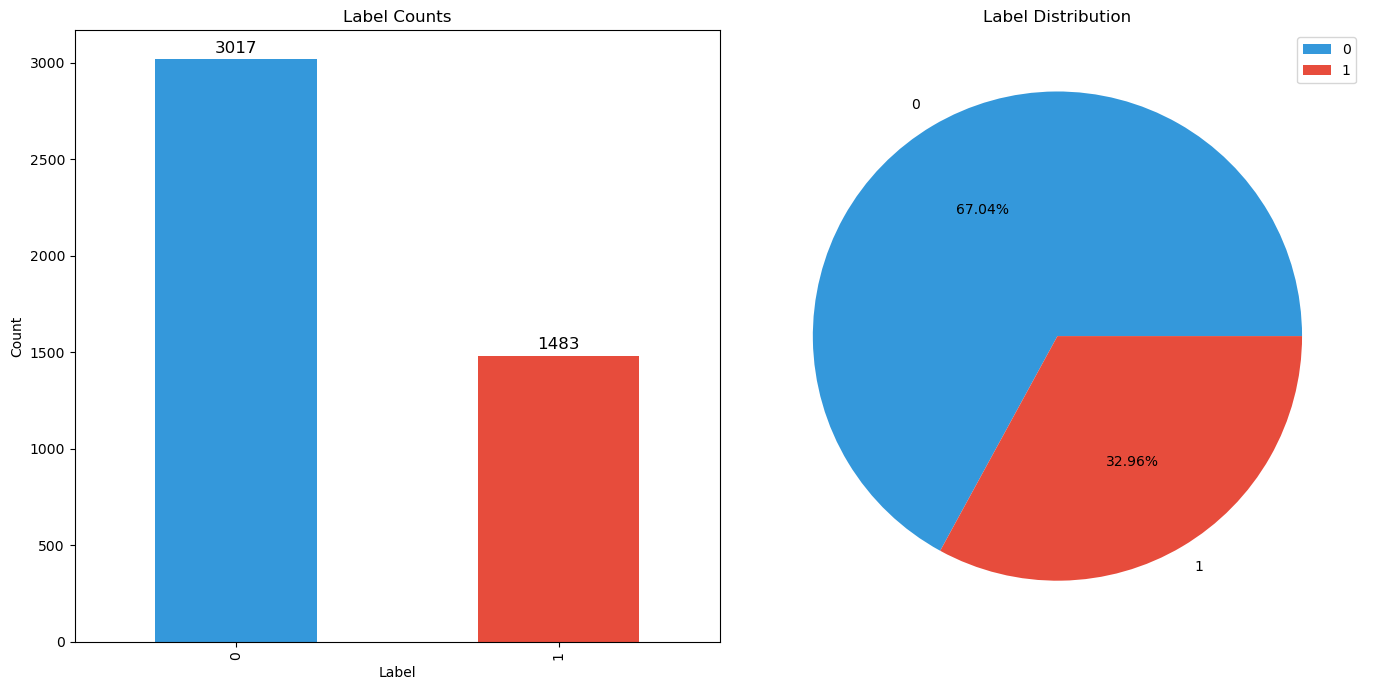

In [15]:
import matplotlib.pyplot as plt

# Custom color palette
custom_palette = ["#3498db", "#e74c3c"]

counts = df["Label"].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Bar plot
counts.plot(kind="bar", ax=axes[0], color=custom_palette)
axes[0].set_title("Label Counts")
axes[0].set_xlabel("Label")
axes[0].set_ylabel("Count")

# Adding bar labels
for bar in axes[0].patches:
    axes[0].annotate(format(bar.get_height(), '.0f'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', size=12, xytext=(0, 8),
                     textcoords='offset points')

# Pie chart
axes[1].pie(counts, labels=counts.index, autopct="%0.2f%%", colors=custom_palette)
axes[1].set_title("Label Distribution")
axes[1].legend(counts.index, loc="upper right")

plt.tight_layout()
plt.show()

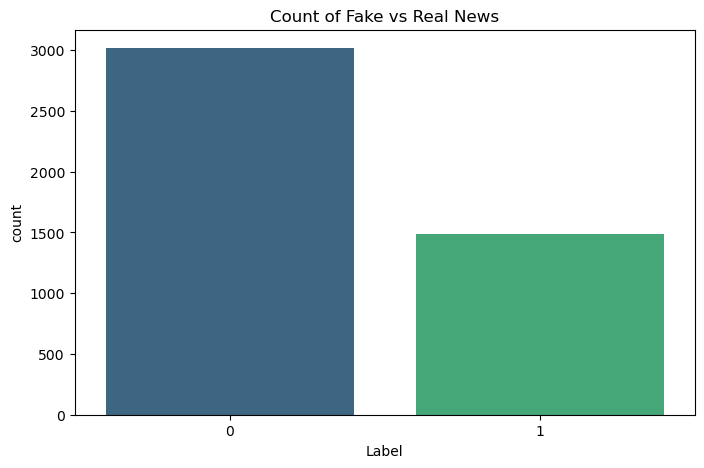

In [24]:
def plot_count(df):
    display(HTML("<h2>Count of Fake vs. Real News</h2>"))
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='Label', palette="viridis")
    plt.title("Count of Fake vs Real News")
    plt.show()

plot_count(df)

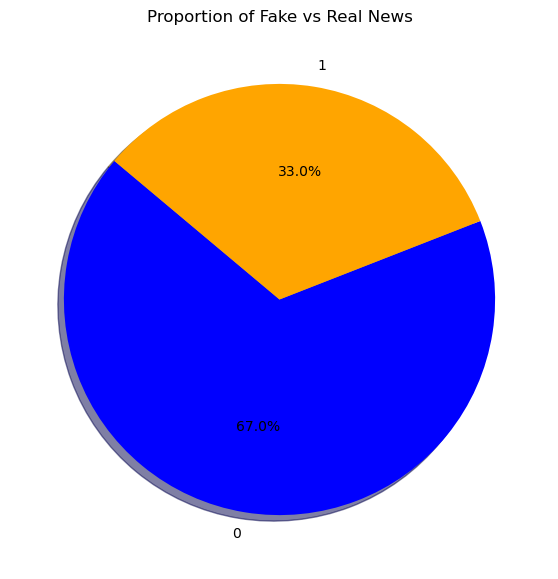

In [41]:
def plot_pie_chart(df):
    display(HTML("<h2>Proportion of Fake vs Real News Articles</h2>"))
    labels = df['Label'].value_counts().index
    sizes = df['Label'].value_counts().values
    colors = ['blue', 'orange']
    
    plt.figure(figsize=(7, 7))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title("Proportion of Fake vs Real News")
    plt.show()

plot_pie_chart(df)


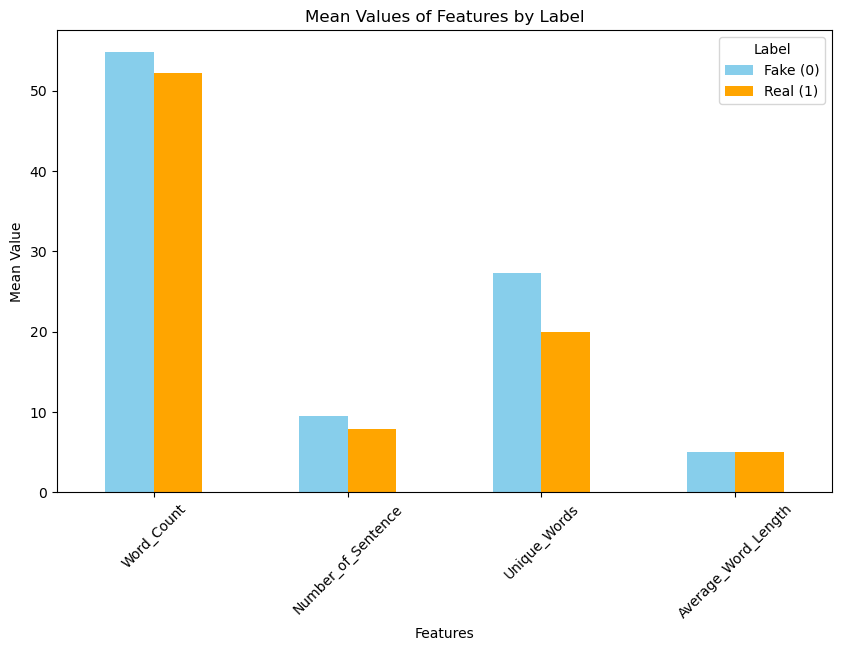

In [37]:
mean_values = df.groupby('Label')[features].mean().T

mean_values.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title("Mean Values of Features by Label")
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.legend(['Fake (0)', 'Real (1)'], title='Label')
plt.show()


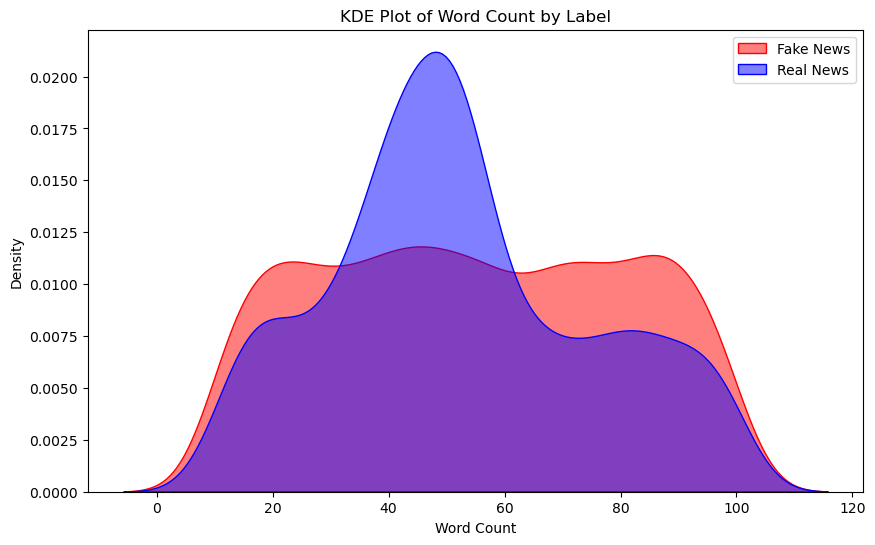

In [38]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Label'] == 0]['Word_Count'], color='red', label='Fake News', fill=True, alpha=0.5)
sns.kdeplot(df[df['Label'] == 1]['Word_Count'], color='blue', label='Real News', fill=True, alpha=0.5)
plt.title("KDE Plot of Word Count by Label")
plt.xlabel("Word Count")
plt.legend()
plt.show()


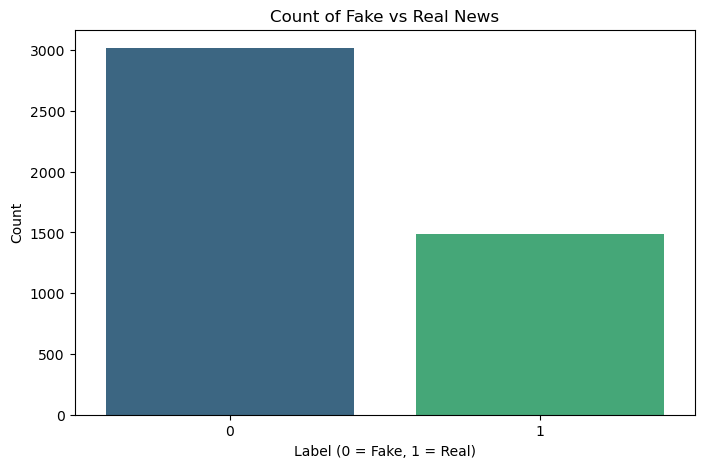

In [42]:

def plot_count(df):
    display(HTML("<h2>Count of Fake vs. Real News Articles</h2>"))
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='Label', palette="viridis")
    plt.title("Count of Fake vs Real News")
    plt.xlabel("Label (0 = Fake, 1 = Real)")
    plt.ylabel("Count")
    plt.show()

plot_count(df)


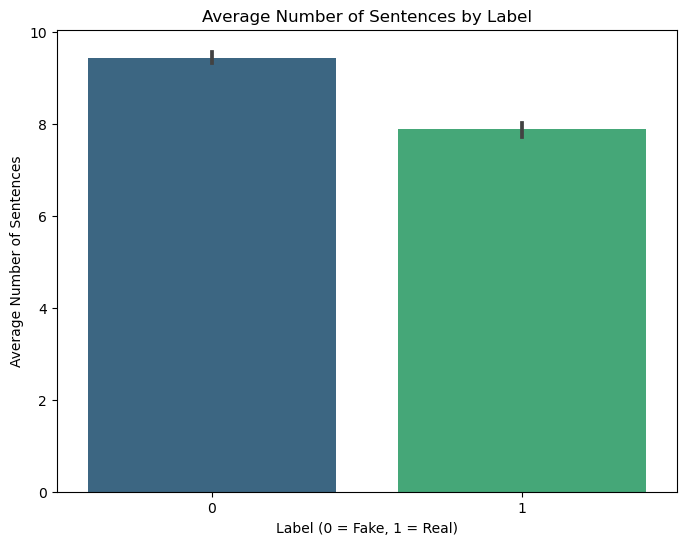

In [45]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Label', y='Number_of_Sentence', palette='viridis')
plt.title("Average Number of Sentences by Label")
plt.xlabel("Label (0 = Fake, 1 = Real)")
plt.ylabel("Average Number of Sentences")
plt.show()


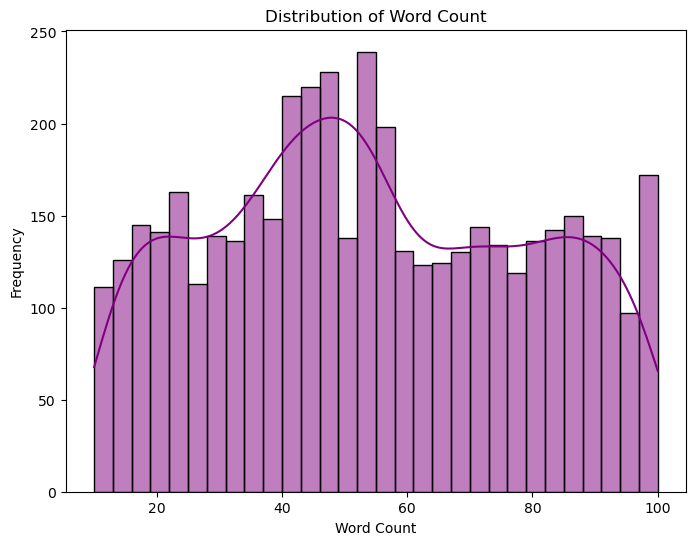

In [46]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Word_Count'], bins=30, kde=True, color='purple')
plt.title("Distribution of Word Count")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


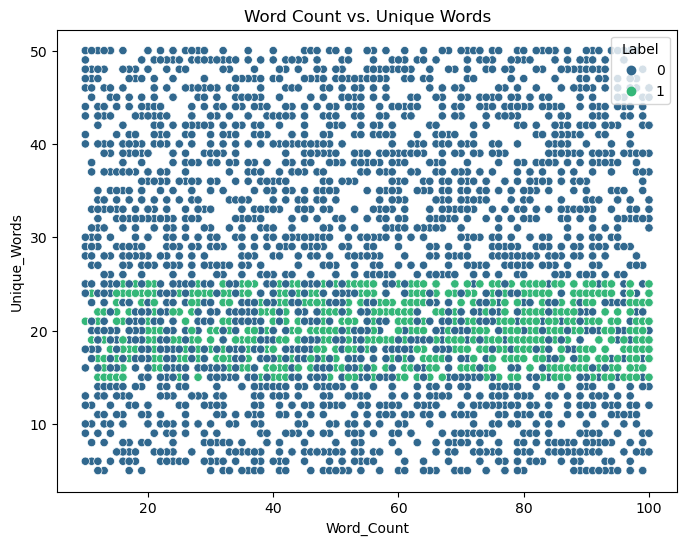

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Word_Count', y='Unique_Words', hue='Label', palette='viridis')
plt.title("Word Count vs. Unique Words")
plt.show()


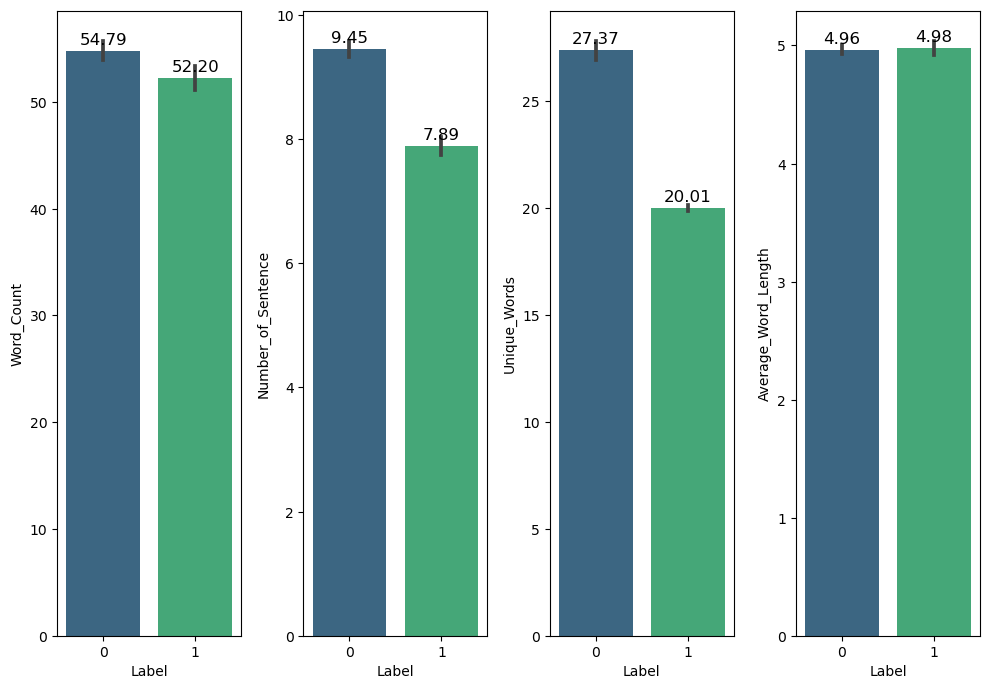

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Define the custom function to create plots
def plots(df, x_col, y_col, ax):
    sns.barplot(data=df, x=x_col, y=y_col, ax=ax, palette="viridis")

# HTML display for mean values
display(HTML("<h1>Mean values for fake and real news features</h1>"))

# Plot mean values
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 7))  # Increased figsize for better readability
for i, j in enumerate(df.columns[:-1][:4]):  # Adjusting to only display the first 4 columns for better layout
    plots(df, "Label", j, axes[i])
    for bar in axes[i].patches:
        axes[i].annotate(format(bar.get_height(), '.2f'),
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='center', size=12, xytext=(0, 8),
                         textcoords='offset points')

plt.tight_layout()
plt.show()



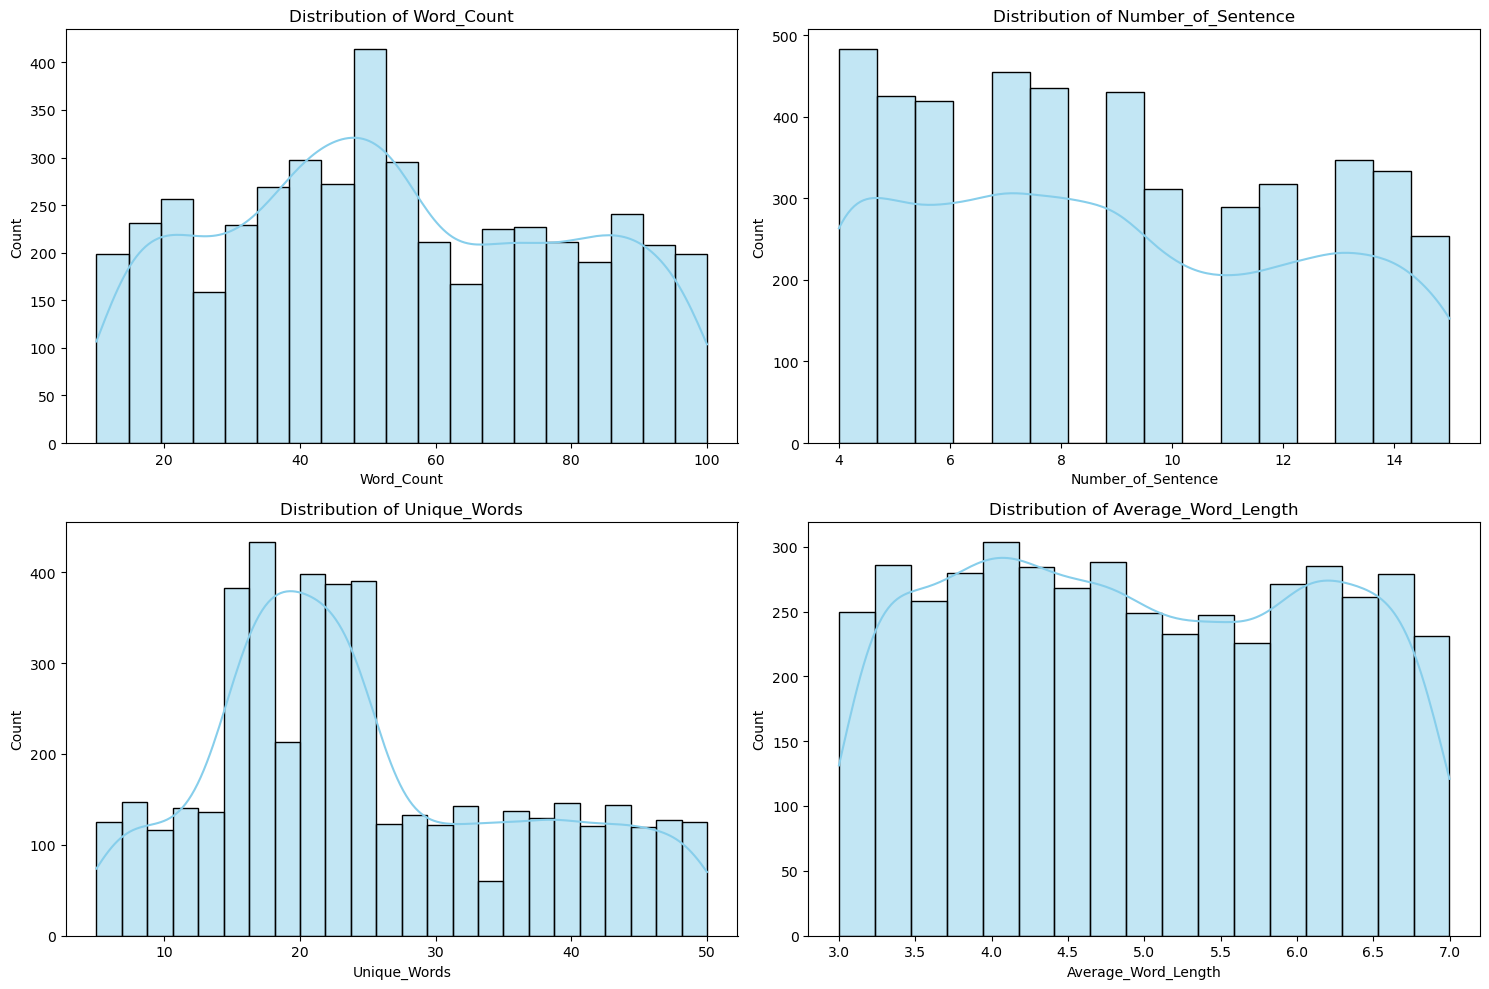

In [28]:
features = ['Word_Count', 'Number_of_Sentence', 'Unique_Words', 'Average_Word_Length']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()


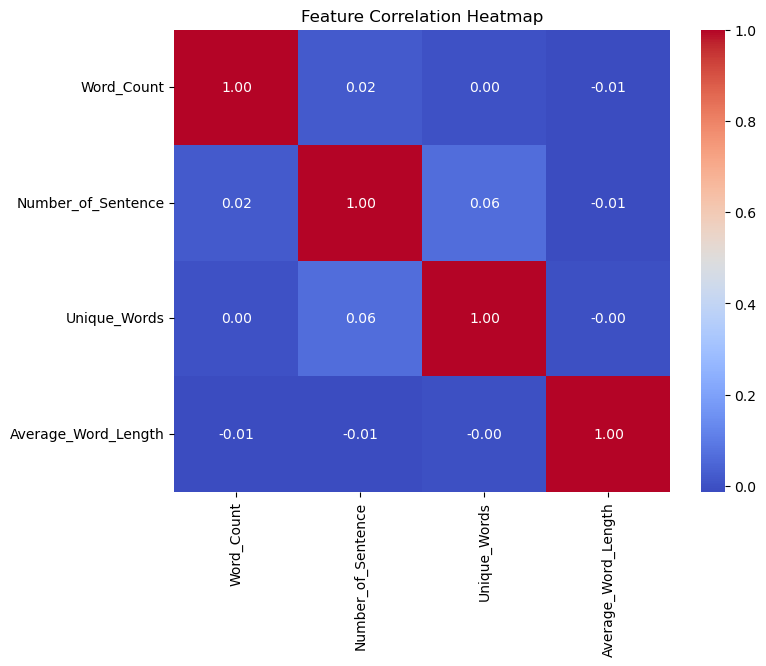

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


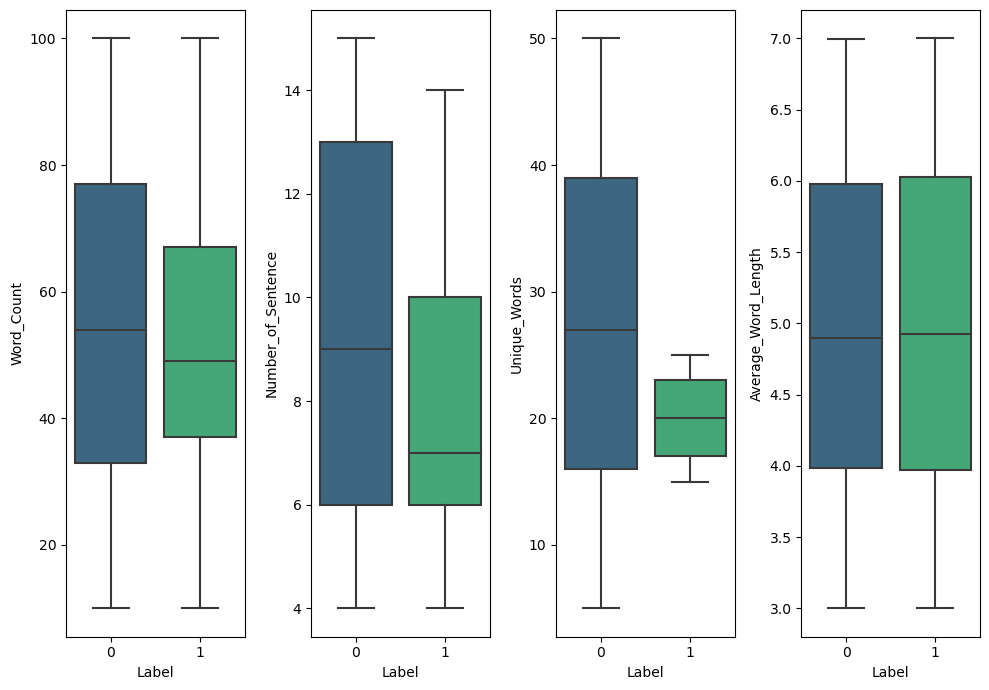

In [22]:
# HTML display for outliers and data distribution
display(HTML("<h1>Outliers and data distribution for fake and real news features</h1>"))

# Plot outliers and data distribution
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 7))  # Increased figsize for better readability
for i, j in enumerate(df.columns[:-1][:4]):  # Adjusting to only display the first 4 columns for better layout
    sns.boxplot(data=df, x="Label", y=j, ax=axes[i], palette="viridis")

plt.tight_layout()
plt.show()

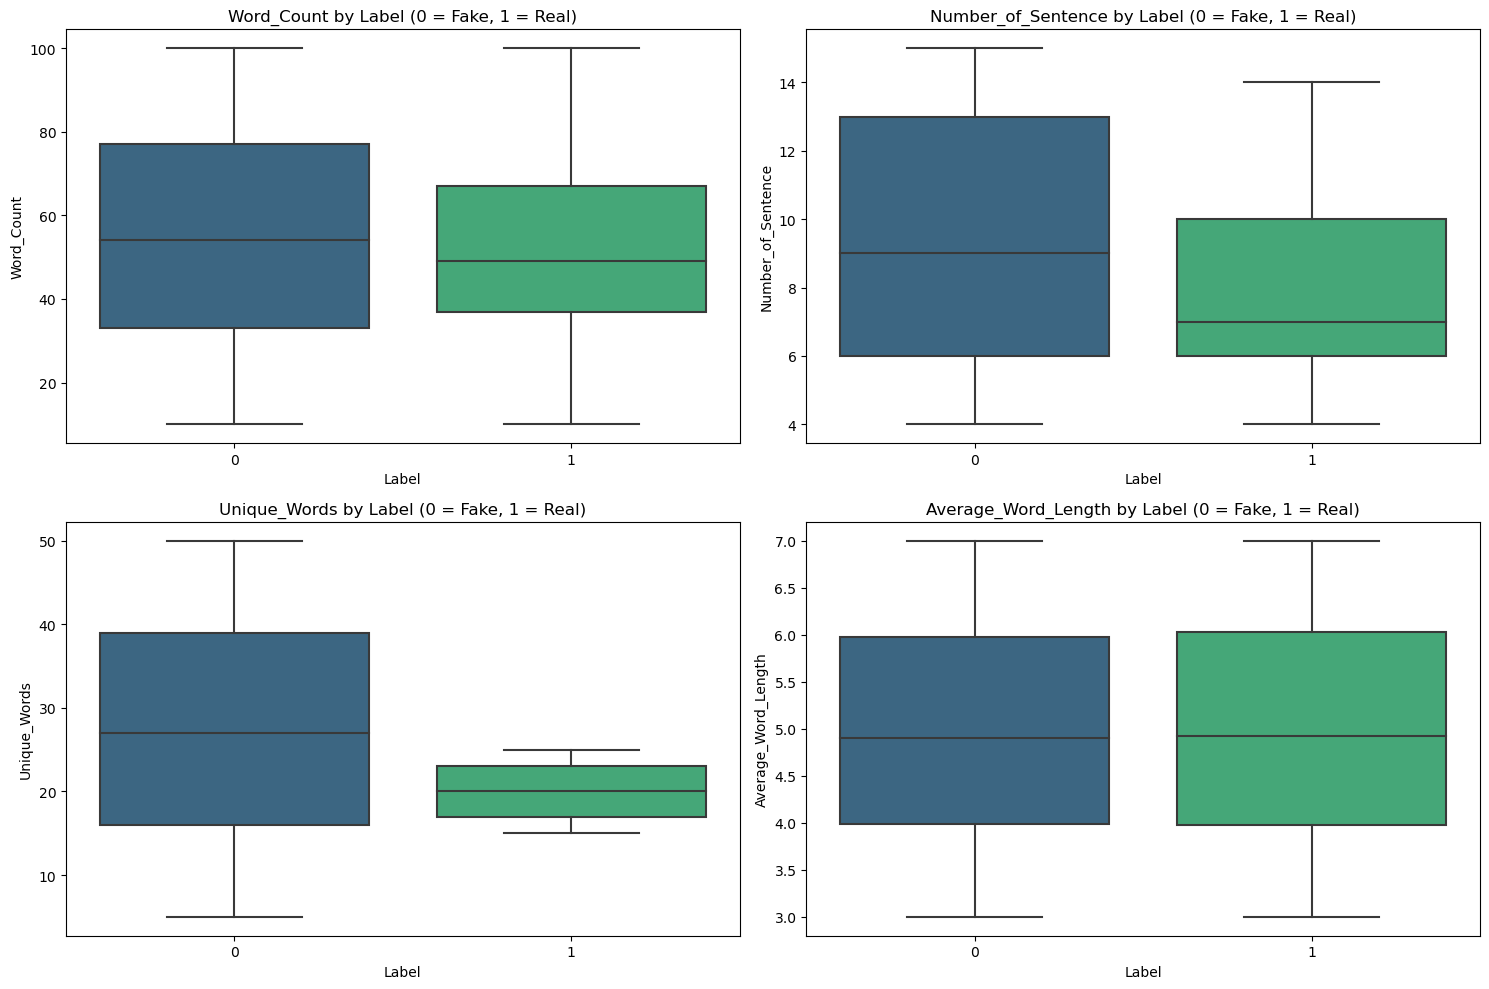

In [35]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='Label', y=feature, palette="viridis")
    plt.title(f"{feature} by Label (0 = Fake, 1 = Real)")
plt.tight_layout()
plt.show()


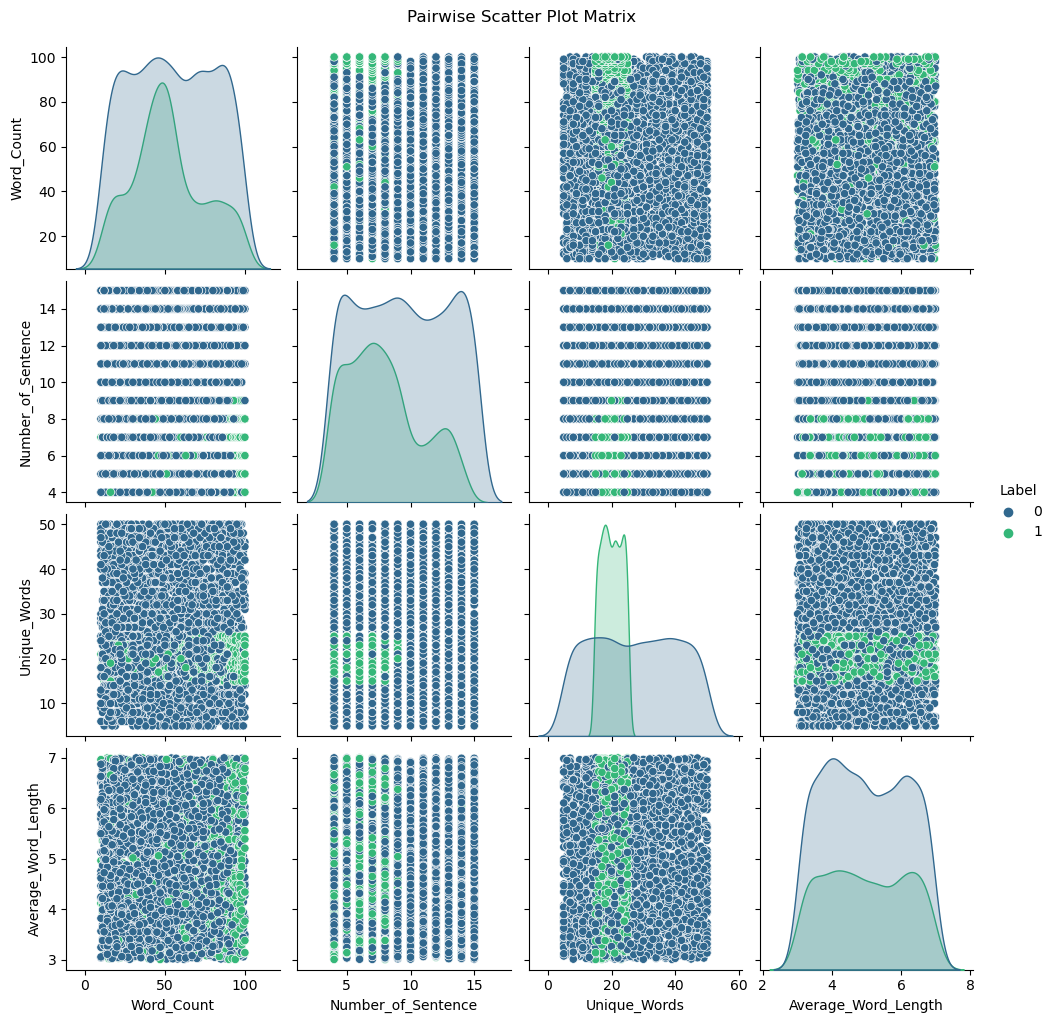

In [32]:
sns.pairplot(df, hue='Label', vars=features, palette='viridis')
plt.suptitle("Pairwise Scatter Plot Matrix", y=1.02)
plt.show()


In [ ]:
sns.pairplot(df, vars=df.columns[:-1], hue=df.columns[-1])
plt.show()

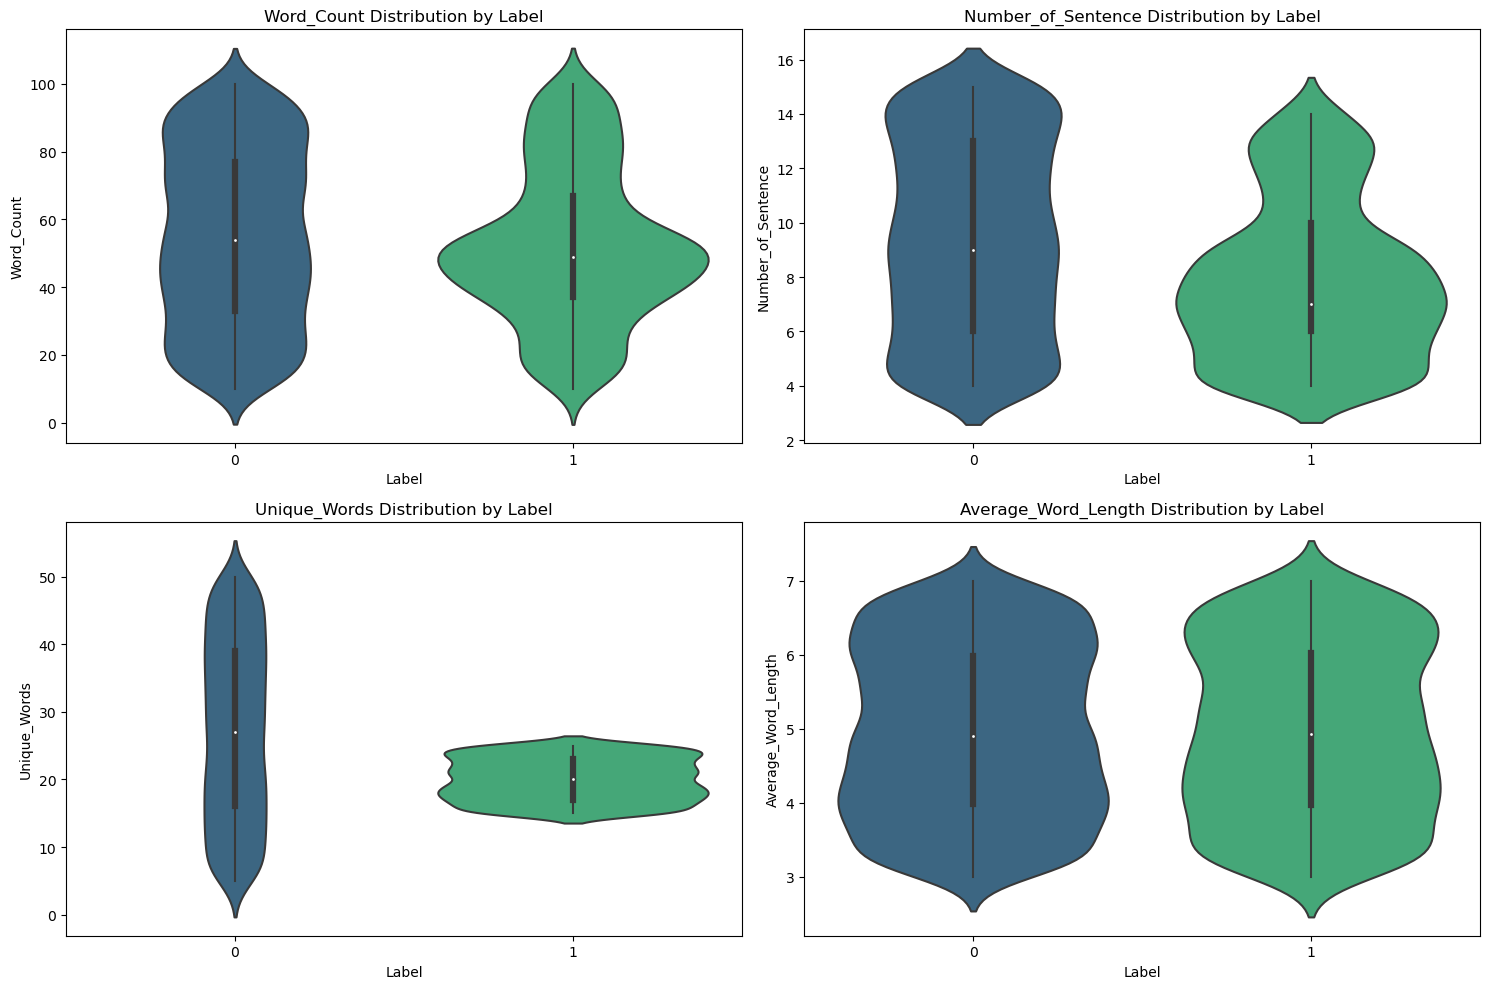

In [33]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(data=df, x='Label', y=feature, palette="viridis")
    plt.title(f"{feature} Distribution by Label")
plt.tight_layout()
plt.show()
